In [46]:
import pandas as pd
import numpy as np
import random
import plotly as px
import plotly_express as go

import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
import warnings

color_pal = sns.color_palette("husl", 9)
warnings.filterwarnings('ignore')


import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


In [47]:
import pandas as pd

# Load the CSV file without headers
df = pd.read_csv("AI modelling - DATA.csv", header=None)

# Assign new column names since they lack column names  
df.columns = ['Datetime', 'Temperature']
df

,Datetime,Temperature
0,2024-08-30 12:49:00,22.85
1,2024-08-30 12:50:00,22.85
2,2024-08-30 12:50:00,22.85
3,2024-08-30 12:51:00,22.81
4,2024-08-30 12:51:00,22.84
...,...,...
46980,2024-10-17 12:15:00,19.57
46981,2024-10-17 12:15:00,25.00
46982,2024-10-17 12:19:00,25.00
46983,2024-10-17 12:23:00,25.00


In [48]:
df.describe()

,Temperature
count,46985.000000
mean,21.529063
std,42.854934
min,3.120000
25%,18.450000
50%,20.810000
75%,22.060000
max,655.350000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46985 entries, 0 to 46984
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Datetime     46985 non-null  object 
 1   Temperature  46985 non-null  float64
dtypes: float64(1), object(1)
memory usage: 734.3+ KB


# CREATE MODEL 

In [50]:
from sklearn.model_selection import train_test_split

# Define your feature matrix (X) and target variable (y)
X = df.drop(columns=['Datetime'])
y = df['Temperature']

#prepare taining set
X_train, X_test, y_train, y_test = train_test_split( X ,y , random_state=1, test_size=0.20)


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Define regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGBoost Regressor': xgb.XGBRegressor()
}

# Train and evaluate models
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        print(f"{name}: {score}")
    except Exception as e:
        print(f"Error with {name}: {e}")

Linear Regression: 1.0
Decision Tree Regressor: 0.9999999987796151
Support Vector Regressor: 0.6657792446452517
K-Nearest Neighbors Regressor: 0.9999999982873067
Random Forest Regressor: 0.9999999992053996
XGBoost Regressor: 0.9999968633082424


In [52]:
from sklearn.linear_model import LinearRegression

# Create an SVR instance correctly
lf = LinearRegression()

# Fit the model
lf.fit(X_train, y_train)

# Print the score
print(lf.score(X_test, y_test))

# Predict on the test set
y_pred = lf.predict(X_test)

# Print predictions
print("Predictions of Average Temperatures Consumed:", y_pred)


1.0
Predictions of Average Temperatures Consumed: [21.6  20.77 23.97 ... 21.66 21.1  22.4 ]


# FEATURE ENGINEERING 

Creating New Features

In [53]:
# Convert the Datetime column to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Create new columns
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour

# Define time of day categories
def categorize_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

df['TimeOfDay'] = df['Hour'].apply(categorize_time_of_day)

# Add day of the week (0 = Monday, 6 = Sunday)
df['Weekday'] = df['Datetime'].dt.weekday

# Let's set the data types to numeric
df['Year'] = df['Year'].astype(int)
df['Weekday'] = df['Weekday'].astype(int)


df.tail()


,Datetime,Temperature,Year,Month,Day,Hour,TimeOfDay,Weekday
46980,2024-10-17 12:15:00,19.57,2024,10,17,12,Afternoon,3
46981,2024-10-17 12:15:00,25.00,2024,10,17,12,Afternoon,3
46982,2024-10-17 12:19:00,25.00,2024,10,17,12,Afternoon,3
46983,2024-10-17 12:23:00,25.00,2024,10,17,12,Afternoon,3
46984,2024-10-17 12:25:00,19.62,2024,10,17,12,Afternoon,3


In [56]:
df = df["Temperature"].shift(1).rolling(7).mean()

# SEASONALITY 

In [58]:
import pandas as pd

# Load the CSV file without headers
df = pd.read_csv("AI modelling - DATA.csv", header=None)

# Assign appropriate column names (assuming the first column is the datetime and the second is some value)
df.columns = ['Datetime', 'Temperature']

# Convert the 'Datetime' column to pandas datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')

# Check for any rows where the conversion failed
print("Rows with invalid datetime values:")
print(df[df['Datetime'].isna()])

# Extract the day of the week if the conversion was successful
df['day_of_week'] = df['Datetime'].dt.day_name()

# Display the updated dataframe
print(df)


weekends_mean = df[(df["day_of_week"] == "Saturday") | (df["day_of_week"] == "Sunday")]["Temperature"].mean()
weekdays_mean = df[(df["day_of_week"] == "Saturday") & ~(df["day_of_week"] == "Sunday")]["Temperature"].mean()
print(f"Weekday Mean Peak Temperature : {weekdays_mean} \nWeekend Mean Peak Temperature : {weekends_mean}")

Rows with invalid datetime values:
Empty DataFrame
Columns: [Datetime, Temperature]
Index: []
                 Datetime  Temperature day_of_week
0     2024-08-30 12:49:00        22.85      Friday
1     2024-08-30 12:50:00        22.85      Friday
2     2024-08-30 12:50:00        22.85      Friday
3     2024-08-30 12:51:00        22.81      Friday
4     2024-08-30 12:51:00        22.84      Friday
...                   ...          ...         ...
46980 2024-10-17 12:15:00        19.57    Thursday
46981 2024-10-17 12:15:00        25.00    Thursday
46982 2024-10-17 12:19:00        25.00    Thursday
46983 2024-10-17 12:23:00        25.00    Thursday
46984 2024-10-17 12:25:00        19.62    Thursday

[46985 rows x 3 columns]
Weekday Mean Peak Temperature : 18.78534183994959 
Weekend Mean Peak Temperature : 26.721411130814346


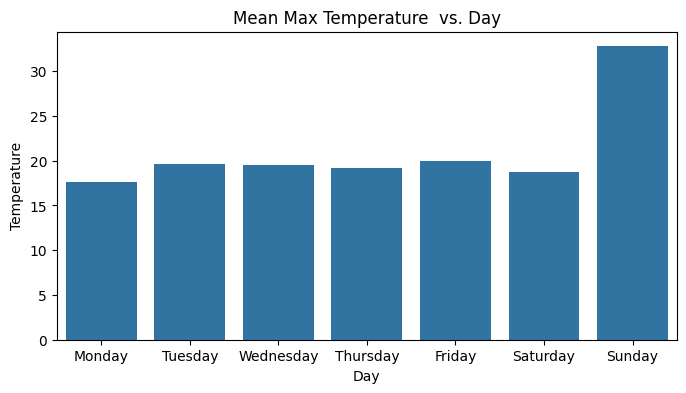

In [61]:
mean_power_day = df[["day_of_week", "Temperature"]].groupby("day_of_week").mean()
plt.figure(figsize = (8,4))
sns.barplot(data = mean_power_day , x = mean_power_day.index , y = mean_power_day["Temperature"], 
           order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday" , "Sunday"])
plt.title("Mean Max Temperature  vs. Day")
plt.ylabel("Temperature")
plt.xlabel("Day")
plt.show()

In [62]:
import pandas as pd
import plotly.express as px

# Load the CSV file without headers
df = pd.read_csv("AI modelling - DATA.csv", header=None)

# Assign appropriate column names (assuming the first column is the datetime and the second is some value)
df.columns = ['Datetime', 'Temperature']

# Convert the 'Datetime' column to pandas datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')

# Extract the day of the week
df['day_of_week'] = df['Datetime'].dt.day_name()

# Calculate the mean temperature for each day of the week
mean_power_day = df.groupby("day_of_week")["Temperature"].mean().reset_index()

# Define the order of the days
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Create a bar plot using Plotly
fig = px.bar(mean_power_day, 
             x='day_of_week', 
             y='Temperature', 
             category_orders={'day_of_week': day_order},
             title='Mean Max Temperature vs. Day',
             labels={'Temperature': 'Temperature', 'day_of_week': 'Day'})

# Show the plot
fig.show()
